In [1]:
import pandas as pd
import numpy as np
import tqdm
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

pd.set_option("max_rows", 200)
pd.set_option("max_columns", 50)
tqdm.tqdm.pandas()
%matplotlib inline

In [32]:
df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle").sort_values(["user_id", "timestamp"]).reset_index(drop=True)

In [33]:
df

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tag,type_of
0,0,24600,7900,0,0,0,1,NaN,NaN,7900,0,1,131 93 81,-1,NaN
1,25379,24600,7876,0,1,2,0,24000.0,False,7876,3,1,10 94 92,-1,NaN
2,50137,24600,175,0,2,2,1,23000.0,False,175,2,1,9 10 92,-1,NaN
3,70181,24600,1278,0,3,3,1,22000.0,False,1278,3,2,143 140 81 29,-1,NaN
4,148601,24600,2064,0,4,2,0,18000.0,False,2063,1,3,157 92 29,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033861,55863864,2147481750,9980,0,45,2,1,3000.0,True,9980,2,5,79,-1,NaN
10033862,55884826,2147481750,5528,0,46,2,1,28000.0,True,5528,2,5,14,-1,NaN
10033863,55910967,2147481750,5279,0,47,3,1,14000.0,True,5279,3,5,177,-1,NaN
10033864,55938555,2147481750,5222,0,48,1,0,20000.0,True,5222,2,5,175,-1,NaN


In [35]:
df = df.reset_index()

In [36]:
df

,index,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tag,type_of
0,0,0,24600,7900,0,0,0,1,NaN,NaN,7900,0,1,131 93 81,-1,NaN
1,1,25379,24600,7876,0,1,2,0,24000.0,False,7876,3,1,10 94 92,-1,NaN
2,2,50137,24600,175,0,2,2,1,23000.0,False,175,2,1,9 10 92,-1,NaN
3,3,70181,24600,1278,0,3,3,1,22000.0,False,1278,3,2,143 140 81 29,-1,NaN
4,4,148601,24600,2064,0,4,2,0,18000.0,False,2063,1,3,157 92 29,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033861,10033861,55863864,2147481750,9980,0,45,2,1,3000.0,True,9980,2,5,79,-1,NaN
10033862,10033862,55884826,2147481750,5528,0,46,2,1,28000.0,True,5528,2,5,14,-1,NaN
10033863,10033863,55910967,2147481750,5279,0,47,3,1,14000.0,True,5279,3,5,177,-1,NaN
10033864,10033864,55938555,2147481750,5222,0,48,1,0,20000.0,True,5222,2,5,175,-1,NaN


In [43]:
df_oof = pd.read_csv("../output/ex_111/20201123160621/oof_train_0_lgbm.csv")

In [44]:
df_oof = df_oof.rename(columns={"row_id": "index"})

In [45]:
df_oof2 = pd.read_csv("../output/ex_110/20201123163247/oof_train_0_lgbm.csv")
df_oof2 = df_oof2.rename(columns={"row_id": "index"})

In [47]:
df_oof2 = pd.merge(df_oof2, df[["index", "correct_answer"]])

In [49]:
df_oof2["predict"] = [x[int(x[6])+1] for x in df_oof2.values]

In [50]:
df_oof["predict2"] = df_oof2["predict"]

In [63]:
roc_auc_score(df_oof["target"].values, df_oof["predict2"].values*0.2 + df_oof["predict"].values)

0.7827178784343186

In [28]:
df_oof2["predict"]

row_id
45          0.163825
46          0.645549
47          0.288614
48          0.146502
49          0.644255
              ...   
10033861    0.888944
10033862    0.863109
10033863    0.941382
10033864    0.513821
10033865    0.962736
Name: predict, Length: 1825197, dtype: float64

In [25]:
df_oof["predict"]

row_id
45          0.420518
46          0.750781
47          0.409510
48          0.431359
49          0.787787
              ...   
10033861    0.865307
10033862    0.842721
10033863    0.924880
10033864    0.372705
10033865    0.978843
Name: predict, Length: 1825197, dtype: float64

In [11]:
df = df.reset_index()

In [12]:
df_oof = df_oof.reset_index()
df_oof.columns = ["index", "predict", "target"]

In [13]:
df_oof

,index,predict,target
0,45,0.420518,0.0
1,46,0.750781,1.0
2,47,0.409510,0.0
3,48,0.431359,0.0
4,49,0.787787,1.0
...,...,...,...
1825192,10033861,0.865307,1.0
1825193,10033862,0.842721,1.0
1825194,10033863,0.924880,1.0
1825195,10033864,0.372705,0.0


In [14]:
df2 = pd.merge(df, df_oof, how="inner")

In [15]:
df2

,index,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tag,type_of,user_count,user_count_50,predict,target
0,45,1453702,24600,1262,0,31,0,0.0,16000.0,True,1262,1,2,143 71 81 29,-1,NaN,45,True,0.420518,0.0
1,46,1477283,24600,1348,0,32,3,1.0,19000.0,True,1348,3,2,143 105 81 92,-1,NaN,46,True,0.750781,1.0
2,47,1502268,24600,10686,0,33,3,0.0,14000.0,True,10686,0,2,62 137 142 38 29,-1,NaN,47,True,0.409510,0.0
3,48,1526285,24600,754,0,34,3,0.0,19000.0,True,754,1,2,137 88 38 81,-1,NaN,48,True,0.431359,0.0
4,49,1550831,24600,801,0,35,0,1.0,14000.0,True,801,0,2,143 20 38 29,-1,NaN,49,True,0.787787,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825192,10033861,55863864,2147481750,9980,0,45,2,1.0,3000.0,True,9980,2,5,79,-1,NaN,45,True,0.865307,1.0
1825193,10033862,55884826,2147481750,5528,0,46,2,1.0,28000.0,True,5528,2,5,14,-1,NaN,46,True,0.842721,1.0
1825194,10033863,55910967,2147481750,5279,0,47,3,1.0,14000.0,True,5279,3,5,177,-1,NaN,47,True,0.924880,1.0
1825195,10033864,55938555,2147481750,5222,0,48,1,0.0,20000.0,True,5222,2,5,175,-1,NaN,48,True,0.372705,0.0


In [16]:
df2 = df2[df2["answered_correctly"].notnull()]

In [17]:
(df2["answered_correctly"] == df2["target"]).sum()

1825197

In [18]:
roc_auc_score(df2["target"].values, df2["predict"].values)

0.7823748334863405

In [19]:
def tags(df):
    tag = df["tags"].str.split(" ", n=10, expand=True)
    tag.columns = [f"tags{i}" for i in range(1, len(tag.columns) + 1)]

    for col in ["tags1", "tags2", "tags3", "tags4", "tags5", "tags6"]:
        if col in tag.columns:
            df[col] = pd.to_numeric(tag[col], errors='coerce').fillna(-1).astype("int16")
        else:
            df[col] = -1
            df[col].astype("int16")

In [20]:
tags(df2)

# part5

In [21]:
for tag in [8, 73, 53, 1, 96, 55]:
    w_df = df2[df2["part"] == 5]
    w_df = w_df[w_df["tags1"] == tag]
    print(f"tag=tag, n={len(w_df)}: auc={round(roc_auc_score(w_df['target'].values, w_df['predict'].values), 4)}")

tag=tag, n=30010: auc=0.7669
tag=tag, n=45175: auc=0.7875
tag=tag, n=39449: auc=0.7969
tag=tag, n=33558: auc=0.7824
tag=tag, n=30552: auc=0.7894
tag=tag, n=22671: auc=0.7598


In [22]:
w_df = df2[(df2["part"] == 5) & (df2["tags1"] == 55)]

In [23]:
w_df["content_id"].value_counts()

9693    384
5352    364
3865    266
6186    264
9315    246
       ... 
3667      2
9338      2
8504      1
3676      1
4759      1
Name: content_id, Length: 285, dtype: int64

In [24]:
w_df.groupby(["content_id", "correct_answer", "user_answer"]).size().to_csv("033_check_low_auc_tag/tags55.csv")

content_id=9693, n=384: auc=0.787
                           predict                    
                             count      mean       std
correct_answer user_answer                            
3              0               199  0.250771  0.146785
               1                25  0.238727  0.163151
               2                37  0.241825  0.172508
               3               123  0.531241  0.306362


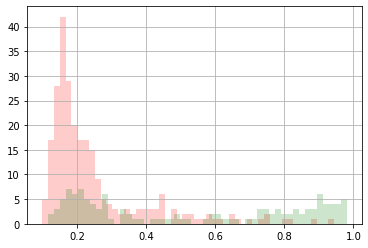

content_id=5352, n=364: auc=0.656
                           predict                    
                             count      mean       std
correct_answer user_answer                            
0              0               114  0.373505  0.245570
               1               102  0.242911  0.121788
               2                58  0.231808  0.087974
               3                90  0.263901  0.127235


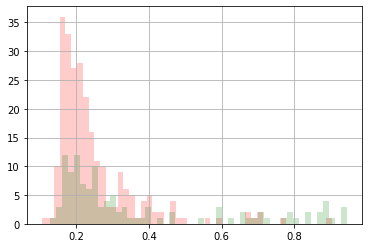

content_id=3865, n=266: auc=0.7649
                           predict                    
                             count      mean       std
correct_answer user_answer                            
2              0                39  0.181116  0.107557
               1               126  0.162395  0.089955
               2                70  0.396588  0.265503
               3                31  0.213158  0.124185


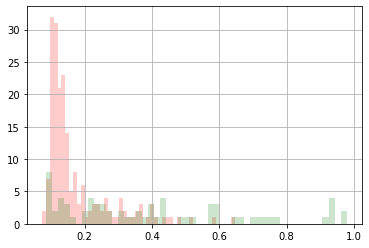

content_id=6186, n=264: auc=0.6903
                           predict                    
                             count      mean       std
correct_answer user_answer                            
0              0               101  0.530926  0.232531
               1               141  0.396062  0.151737
               2                14  0.322566  0.172468
               3                 8  0.202826  0.031036


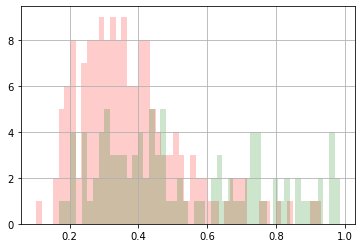

content_id=9315, n=246: auc=0.6698
                           predict                    
                             count      mean       std
correct_answer user_answer                            
3              0                47  0.528805  0.135585
               1                35  0.501259  0.149443
               2                44  0.518385  0.147061
               3               120  0.607617  0.149816


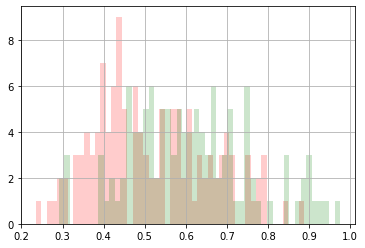

In [25]:
for content_id in [9693, 5352, 3865, 6186, 9315]:
    ww_df = w_df[w_df["content_id"] == content_id]
    print(f"content_id={content_id}, n={len(ww_df)}: auc={round(roc_auc_score(ww_df['target'].values, ww_df['predict'].values), 4)}")
    print(ww_df.groupby(["correct_answer", "user_answer"]).agg({"predict": ["count", "mean", "std"]}))
    ww_df[ww_df["target"]==0]["predict"].hist(bins=50, alpha=0.2, color="red")
    ww_df[ww_df["target"]==1]["predict"].hist(bins=50, alpha=0.2, color="green")
    plt.show()

In [26]:
df[df["content_id"] == 9315]["user_count_50"].value_counts()

False    901
True     582
Name: user_count_50, dtype: int64

content_id=9693, n=312: auc=0.825
                           predict                    
                             count      mean       std
correct_answer user_answer                            
3              0               169  0.256336  0.154903
               1                16  0.254549  0.193484
               2                25  0.271799  0.202928
               3               102  0.590735  0.297056


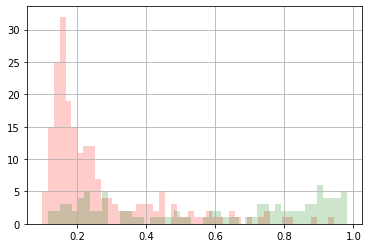

content_id=5352, n=342: auc=0.6614
                           predict                    
                             count      mean       std
correct_answer user_answer                            
0              0               110  0.378609  0.248397
               1                92  0.242981  0.126263
               2                52  0.227315  0.085086
               3                88  0.265456  0.128187


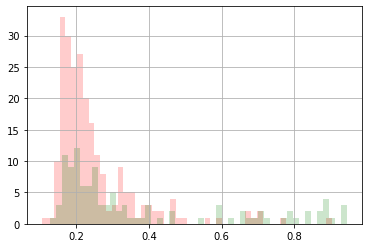

content_id=3865, n=228: auc=0.7852
                           predict                    
                             count      mean       std
correct_answer user_answer                            
2              0                35  0.186581  0.112292
               1                99  0.164214  0.097917
               2                65  0.416062  0.265428
               3                29  0.215158  0.127558


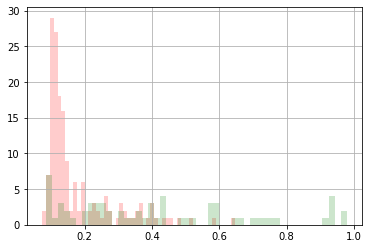

content_id=6186, n=244: auc=0.7031
                           predict                    
                             count      mean       std
correct_answer user_answer                            
0              0                93  0.552266  0.228178
               1               137  0.401274  0.150765
               2                 9  0.383905  0.188566
               3                 5  0.207361  0.037942


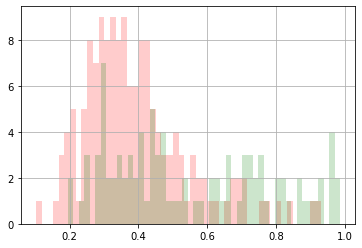

content_id=9315, n=174: auc=0.6034
                           predict                    
                             count      mean       std
correct_answer user_answer                            
3              0                29  0.549885  0.152252
               1                21  0.577088  0.133550
               2                24  0.580984  0.131196
               3               100  0.628003  0.145287


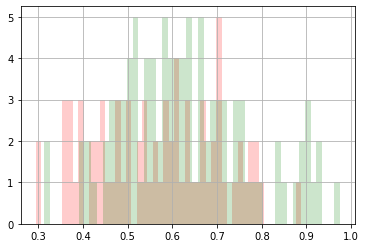

In [27]:
for content_id in [9693, 5352, 3865, 6186, 9315]:
    ww_df = w_df[w_df["content_id"] == content_id]
    ww_df = ww_df[ww_df["user_count_50"] == 0]
    print(f"content_id={content_id}, n={len(ww_df)}: auc={round(roc_auc_score(ww_df['target'].values, ww_df['predict'].values), 4)}")
    print(ww_df.groupby(["correct_answer", "user_answer"]).agg({"predict": ["count", "mean", "std"]}))
    ww_df[ww_df["target"]==0]["predict"].hist(bins=50, alpha=0.2, color="red")
    ww_df[ww_df["target"]==1]["predict"].hist(bins=50, alpha=0.2, color="green")
    plt.show()